**🔹Import Libraries**

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


🔹**Load CSV**




In [37]:
df = pd.read_csv("Iris.csv")


In [38]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**🔹Encode the Target(Species)**

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

In [42]:
print(le.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [43]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


**🔹Select Features and Target**

In [44]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species_encoded'].values

**🔹Normalize the Features**

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**🔹Train/Test Split**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

**🔹Train KNN Classifier for Multiple K Values**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

k_values = [1, 3, 5, 7]

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nK = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


K = 1
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

K = 3
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

K = 5
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

K = 7
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**🔹Visualize Decision Boundaries (K=3 Example)**
📌 First: Extract 2 Features for Plotting
📌 Then: Train KNN (K=3) and Create Decision Plot

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use only PetalLengthCm and PetalWidthCm
X_plot = df[['PetalLengthCm', 'PetalWidthCm']].values
y_plot = df['Species_encoded'].values

# Normalize
scaler = StandardScaler()
X_plot_scaled = scaler.fit_transform(X_plot)

# Split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_plot_scaled, y_plot, test_size=0.3, random_state=42)

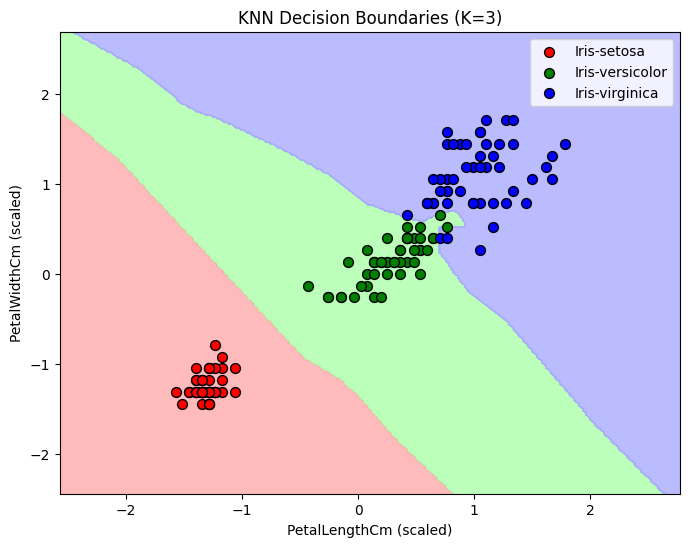

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, y_train2)

# Create mesh grid
h = 0.02
x_min, x_max = X_plot_scaled[:, 0].min() - 1, X_plot_scaled[:, 0].max() + 1
y_min, y_max = X_plot_scaled[:, 1].min() - 1, X_plot_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot training points
for idx, label in enumerate(np.unique(y_plot)):
    plt.scatter(X_plot_scaled[y_plot == label, 0],
                X_plot_scaled[y_plot == label, 1],
                c=cmap_bold[idx], label=le.classes_[label],
                edgecolor='k', s=50)

plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')
plt.title('KNN Decision Boundaries (K=3)')
plt.legend()
plt.savefig('knn_decision_boundaries.png')
plt.show()